# Solving Gravitational Potential of Spherically Symmetric Star

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multigrid import BVP, BVPSolver

## Relaxation and Residual for the Differential Operator

In [2]:
def relax_left(sol, src, s, h):
    return sol[1] - src[0]*h**2/6

def relax_middle(sol, src, s, h, i):
    return (
        + sol[i + 1]*(1 + h/s)
        + sol[i - 1]*(1 - h/s)
        - src[i]*h**2
    )/2

def relax_right(sol, src, s, h):
    return 0

def residual_left(sol, src, s, h):
    return -(relax_left(sol, src, s, h) - sol[0])*6/h**2

def residual_middle(sol, src, s, h, i):
    return -(relax_middle(sol, src, s, h, i) - sol[i])*2/h**2

def residual_right(sol, src, s, h):
    return 0

## Functions for the Source and the Exact Solution

In [3]:
r_s = 8
rho_c = 1.28e-3

def src(s):
    if s < 0.5:
        rho = rho_c*(1 - (s / (1 - s))**2)
        return 4*np.pi*rho*r_s**2*(1 - s)**(-4)
    else:
        return 0

def exact_sol(s):
    if s < 0.5:
        a = s/(1 - s)
        return -2*np.pi*rho_c*r_s**2*(1/2 - a**2/3 + a**4/10)
    else:
        return -8/15*np.pi*rho_c*r_s**2*(1 - s)/s

## Define Boundary Value Problem

In [4]:
s1 = 0
s2 = 1
bvp = BVP((s1, s2), relax_left, relax_middle, relax_right, residual_left, residual_middle, residual_right, src, exact_sol_func=exact_sol)

## Set Multigrid Solver

In [5]:
n = 9
solver = BVPSolver(bvp, n)

## Solving

In [6]:
i = 0
while True:
    i += 1
    solver.solve()
    res_rms = solver.residual().rms()
    print(i, res_rms, solver.exact_error().rms())
    if res_rms < 1e-11:
        break

1 95.59857865968418 0.03256095894350033
2 35.99049153881337 0.005391481019824093
3 14.223967026109426 0.0009506034402093006
4 4.416259982880007 0.00020799620328856147
5 1.2912527935097853 4.015851558688849e-05
6 0.35990980666482264 1.9478664031008533e-05
7 0.10027122775500294 4.760208483762595e-06
8 0.027619609393479357 8.466604426025501e-06
9 0.007524937662512082 7.455046942248711e-06
10 0.0020515947978877553 7.725881614171963e-06
11 0.0005573473345277565 7.652497178595608e-06
12 0.00015060769922478308 7.672406219295788e-06
13 4.0765418681642646e-05 7.666998025713206e-06
14 1.1044961048493434e-05 7.668466676832012e-06
15 2.99261074809317e-06 7.668068078499666e-06
16 8.111205050062502e-07 7.668176125860751e-06
17 2.1983531526019273e-07 7.668146872956692e-06
18 5.951944071940654e-08 7.668154744083743e-06
19 1.612699976989472e-08 7.668152652685992e-06
20 4.394324990141965e-09 7.668153171998941e-06
21 1.1558446308346219e-09 7.66815310127547e-06
22 2.944934036703235e-10 7.668153089351182e-

## Plot Solution

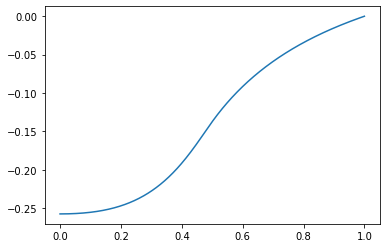

In [7]:
plt.plot(solver.sol_grid.x, solver.sol_grid.val)